In [1]:
import scipy.io as spio
import numpy as np
import sys, os

import matplotlib.pyplot as plt
import math

In [2]:
def convert_data2org(cur_mat, maxV = 25.0):
    import numpy as np
    cur_mat = cur_mat * maxV;
    x = np.exp(cur_mat) - 1.0;

    #print "\nmin \t max"
    #print np.amin(x), np.amax(x)

    neg_idx = x < 0.0
    x[neg_idx] = 0.0

    #print "\nmin \t max"
    #print np.amin(x), np.amax(x)
    
    return x

def plot_results(noisy, nn_output, clean, title=None):
    import numpy as np
    plt.figure(1, figsize=(20,20))
    #if title: plt.suptitle(title, fontsize=16)

    ax = plt.subplot(1, 3, 1)
    ax.set_title("noisy")
    # ax.imshow(np.log10(noisy), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(noisy), interpolation='none')
        
    ax = plt.subplot(1, 3, 2)
    ax.set_title("Neural Nets")
    # ax.imshow(np.log10(nn_output), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(nn_output), interpolation='none')
    
    ax = plt.subplot(1, 3, 3)
    ax.set_title("clean")
    # ax.imshow(np.log10(clean), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(clean), interpolation='none')

    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.9, top=0.88, wspace=0.2, hspace=0.2)
    #plt.subplot_tool()
    plt.show()

### homo

In [3]:
def compute_snr(matfile):
    dat_px = spio.loadmat(matfile, squeeze_me=True)
    dat_px = dat_px['data']

    # each data array is 4D tensor (x , y, z, samples)
    samples = dat_px.shape[-1]
    
    snr_array = np.zeros((samples, 100), dtype=np.float32)
    
    for i in xrange(samples):
        img50 = dat_px[:,49,:,i]  # for current example, take the 50 image along the y-axis
        vect_mid = img50[49,:]
        snr_array[i,:] = vect_mid

    means = np.mean(snr_array, axis=0)
    stds  = np.std(snr_array, axis=0)
    snr_result = 20. * np.log10(means / stds)
    
    return snr_result

In [4]:
snr_dir = '/space/neza/2/users/yaoshen/NEU/Research/MRI filtering/mcxlab_nightlybuild/data'

In [5]:
#
# read snr data set
#

p5_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_homo_1e5_pack1.mat')
p6_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_homo_1e6_pack1.mat')
p7_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_homo_1e7_pack1.mat')
p8_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_homo_1e8_pack1.mat')

In [6]:
for i in p5_snr: print i
# for i in p6_snr: print i
# for i in p7_snr: print i
# for i in p8_snr: print i

48.452522
43.208916
39.431267
37.811825
34.501354
33.307556
30.065956
29.307566
27.928865
27.206095
25.673716
24.411566
24.950073
22.92719
21.281277
20.807663
20.015285
19.983149
19.494516
16.822983
16.425114
15.550366
14.337735
13.870466
12.37291
12.78903
11.631475
10.365063
10.088871
7.849965
8.985281
7.921965
6.740555
7.0139446
4.0822597
5.1118016
3.5493567
1.0657729
2.0863833
2.5238326
0.944122
0.40626013
0.22790924
-1.8998611
-0.5629339
-1.588619
-2.2540908
-3.88724
-3.7903368
-5.038137
-3.3917255
-2.885738
-6.761789
-5.8526306
-8.673715
-6.3611717
-5.8097963
-9.094606
-7.686366
-12.657196
-9.939059
-10.102304
-15.10729
-15.499943
-14.730639
-14.618452
-15.284269
-16.11986
-12.468667
-11.600588
-9.793984
-11.883753
-13.54385
-16.440311
-13.577494
-14.747925
-10.548069
-17.408276
-16.990707
-13.18241
-15.928019
-13.179549
-15.269484
-14.160837
-18.529352
-18.96271
-17.872097
-17.403408
-18.336237
-19.82129
-12.692865
-19.661373
-13.487067
-15.298625
-13.18533
-13.548264
-19.703136


### NN model output

In [7]:
def compute_snr_from_array(nn_hom1e5):
    [samples, im_w, im_h] = nn_hom1e5.shape
    snr_array = np.zeros((samples, im_h), dtype=np.float32)

    for i in xrange(samples):
        vect_mid = nn_hom1e5[i,49,:]  # take the 50th vector of 100x100
        snr_array[i,:] = vect_mid  # save 100

    means = np.mean(snr_array, axis=0)
    stds  = np.std(snr_array, axis=0)
    
#     log_array = np.log(snr_array)
#     log_means = np.mean(log_array, axis=0)
#     log_std   = np.std(log_array, axis=0)
#     print "\n log_means"
#     for i in log_means: print i
#     print "\nlog_std"
#     for i in log_std: print i
        
#    log10_array = np.log10(snr_array)
#    log10_means = np.mean(log10_array, axis=0)
#    log10_std   = np.std(log10_array, axis=0)
#    print "\n log10_means"
#    for i in log10_means: print i
#    print "\nlog10_std"
#    for i in log10_std: print i
        
        
    snr_result = 20. * np.log10(means / stds)
    
    return snr_result

In [8]:
nn_hom1e5 = spio.loadmat('../test_results/snr_hom1e5_nn.mat', squeeze_me=True)
nn_hom1e5 = nn_hom1e5['output_clean']
print nn_hom1e5.shape
nn_hom1e5 = convert_data2org(nn_hom1e5) # convert back to original format

nn_snr = compute_snr_from_array(nn_hom1e5)

(100, 100, 100)


In [9]:
for i in nn_snr: print i

42.984123
38.69281
37.086334
36.142143
37.178234
38.21118
31.716661
33.69256
31.709335
27.75897
32.25723
29.61954
34.02428
35.747128
34.85477
34.824722
32.7407
32.631172
32.47542
30.91251
29.649529
30.159445
28.138235
28.263737
27.074318
25.674305
24.948605
24.384102
24.23386
23.695238
22.612696
21.445839
20.613184
19.934225
18.196268
17.741491
16.676615
16.195143
15.917856
15.278179
14.761799
14.754886
14.122248
12.241858
11.420779
10.437208
9.6935215
10.055134
9.954483
9.334663
9.18033
9.34864
9.404155
10.064533
10.190071
10.33083
10.673864
10.856925
11.114807
12.045221
12.901072
13.82389
14.909164
15.8399
17.091642
18.269629
19.463375
20.876234
21.725199
22.70211
24.259548
25.047192
25.448006
26.285461
26.432236
27.335863
28.726048
30.179409
32.888557
35.28524
37.973083
40.352386
42.64164
44.42308
45.54882
47.149395
49.802658
52.876587
54.099884
53.919098
55.15561
55.771107
57.147057
58.95207
60.737286
63.428326
67.38338
72.34016
78.47558
82.44674


### absorber3

In [10]:
#
# read snr data set
#
p5_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_absorber3_1e5_pack1.mat')
p6_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_absorber3_1e6_pack1.mat')
p7_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_absorber3_1e7_pack1.mat')
p8_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_absorber3_1e8_pack1.mat')

In [11]:
# for i in p5_snr: print i
# for i in p6_snr: print i
# for i in p7_snr: print i
# for i in p8_snr: print i

In [12]:
#
# neural nets
#
nn_result = spio.loadmat('../test_results/snr_absorb1e5_nn.mat', squeeze_me=True)
nn_result = nn_result['output_clean']
print nn_result.shape
nn_result = convert_data2org(nn_result) # convert back to original format

nn_snr = compute_snr_from_array(nn_result)

(100, 100, 100)


In [13]:
for i in nn_snr: print i

42.827225
37.307278
37.676376
37.085403
35.587772
32.42934
32.399128
30.1637
33.488037
30.731583
31.85009
35.06001
32.92733
32.14853
30.82429
28.842478
28.207672
25.984268
24.01051
23.308933
22.926218
21.569866
20.118494
17.734154
16.677975
16.299969
15.637785
14.626368
14.958775
15.5226
15.917516
16.082163
16.456087
17.475033
17.272648
16.825514
17.10582
18.335138
20.557713
23.674297
27.314436
30.845701
34.70901
37.086704
39.516148
42.8892
48.132214
53.75293
59.284
63.001743
64.97634
67.712105
71.79582
77.28101
84.56585
88.930466
89.3786
89.88926
91.93505
90.32905
89.428085
89.94911
90.63594
93.80616
94.796936
98.673965
102.31111
100.871704
99.90159
101.3022
103.8345
105.04563
104.17751
108.90454
109.453316
107.71164
106.588356
109.22475
109.890625
108.3319
112.98068
107.608345
105.05505
106.39858
109.15683
116.48243
118.082565
114.07342
119.110825
125.18089
123.507065
122.133095
116.98364
116.353485
110.94516
109.92735
124.67377
118.774155
116.49248
121.04294


### refractive

In [14]:
#
# read snr data set
#
p5_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_refractive_1e5_pack1.mat')
p6_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_refractive_1e6_pack1.mat')
p7_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_refractive_1e7_pack1.mat')
p8_snr = compute_snr(snr_dir + '/journal2_50ns_vol100_refractive_1e8_pack1.mat')

In [15]:
# for i in p5_snr: print i
# for i in p6_snr: print i
# for i in p7_snr: print i
# for i in p8_snr: print i

In [16]:
#
# neural nets
#
nn_result = spio.loadmat('../test_results/snr_refractive1e5_nn.mat', squeeze_me=True)
nn_result = nn_result['output_clean']
print nn_result.shape
nn_result = convert_data2org(nn_result) # convert back to original format

nn_snr = compute_snr_from_array(nn_result)

(100, 100, 100)


In [17]:
for i in nn_snr: print i

42.09082
38.852097
37.79196
35.918045
36.952965
37.93276
33.25115
34.9478
30.131447
34.089695
23.568945
32.133068
31.620804
36.485214
35.970997
35.81732
34.59969
34.622078
34.085922
32.87749
31.871817
31.980911
30.703411
30.819817
29.872646
27.695038
28.167511
27.811554
26.854805
26.356087
25.59226
24.35392
24.542488
22.839945
22.541565
21.824999
21.139229
20.042974
19.051746
18.466137
17.280901
16.959187
16.178768
15.6585455
15.648861
15.795732
15.924535
15.90844
15.801508
16.132803
18.5684
19.381699
20.152523
20.625568
21.932203
20.945349
20.472313
20.611849
21.334944
22.04932
23.678547
25.737206
27.956978
30.134537
32.1856
34.103912
36.306507
37.917404
39.421036
40.38866
40.930347
41.659016
42.95333
45.089294
47.67071
49.796833
51.283432
53.06284
55.270256
58.174698
61.172485
64.625534
68.245476
68.63006
70.73602
70.14128
70.1047
69.66295
70.07526
72.290085
75.76851
81.08714
88.99612
94.2665
96.4442
93.86867
96.63104
95.85605
96.879425
99.03149


### show image 

(100, 100, 100)


/home/users/leiming/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


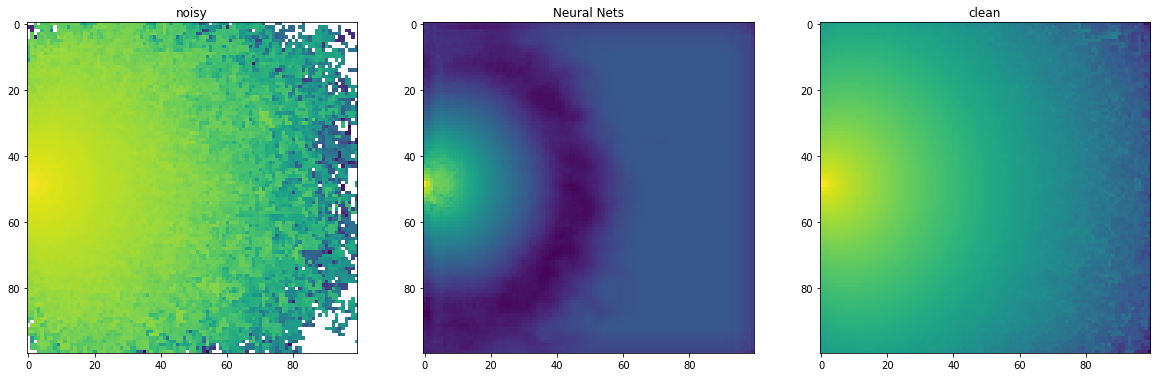

In [18]:
# =====================
#  homo
# =====================
noisy_mat = spio.loadmat(snr_dir + '/journal2_50ns_vol100_homo_1e5_pack1.mat', squeeze_me=True)
noisy_mat = noisy_mat['data']
noisy_img = noisy_mat[:,49,:,0]  # 100x100


clean_mat = spio.loadmat(snr_dir + '/journal2_50ns_vol100_homo_1e8_pack1.mat', squeeze_me=True)
clean_mat = clean_mat['data']
clean_img = clean_mat[:,49,:,0]  # 100x100


nn_hom1e5 = spio.loadmat('../test_results/snr_hom1e5_nn.mat', squeeze_me=True)
nn_hom1e5 = nn_hom1e5['output_clean']
print nn_hom1e5.shape
nn_img = convert_data2org(nn_hom1e5) # convert back to original format
nn_img = nn_img[0,...]

plot_results(noisy_img, nn_img, clean_img)